# DSCI 503-Homework 05

### Daniel Carter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Problem 1: Working with 2D Arrays

In [2]:
np.random.seed(1)
Z = np.random.uniform(0,10,size=(5,8))
Z = np.round(Z, 2)
print(Z)

[[4.17 7.2  0.   3.02 1.47 0.92 1.86 3.46]
 [3.97 5.39 4.19 6.85 2.04 8.78 0.27 6.7 ]
 [4.17 5.59 1.4  1.98 8.01 9.68 3.13 6.92]
 [8.76 8.95 0.85 0.39 1.7  8.78 0.98 4.21]
 [9.58 5.33 6.92 3.16 6.87 8.35 0.18 7.5 ]]


In [3]:
row_3 = Z[2,:]
col_6 = Z[:,5]
print(f'Row 3: {row_3}')
print(f'Column 6: {col_6}')

Row 3: [4.17 5.59 1.4  1.98 8.01 9.68 3.13 6.92]
Column 6: [0.92 8.78 9.68 8.78 8.35]


In [4]:
array_sum = np.sum(Z)
row_sum = np.sum(Z, axis=1)
column_sum = np.sum(Z, axis=0)
print(f'Row Sums: {row_sum}')
print(f'Column Sums: {column_sum}')
print(f'Array Sum: {array_sum}')

Row Sums: [22.1  38.19 40.88 34.62 47.89]
Column Sums: [30.65 32.46 13.36 15.4  20.09 36.51  6.42 28.79]
Array Sum: 183.68


## Problem 2: Reshaping and Stacking Arrays

In [5]:
np.random.seed(167)
x1 = np.random.normal(50,10,1000)
x2 = np.random.normal(20,5,1000)
x3 = np.random.normal(100,30,1000)
x4 = np.random.normal(10,2,1000)
X = np.hstack((x1,x2,x3,x4))
X = X.reshape(1000,4)
X = np.round(X,2)
print(X.shape)

(1000, 4)


In [6]:
print(X[5:])

[[57.06 39.52 62.56 71.18]
 [37.28 61.57 64.33 41.83]
 [60.41 56.48 64.21 56.26]
 ...
 [10.48  5.87  6.25  8.19]
 [ 6.9   9.9   8.57  9.88]
 [ 8.5   9.9  11.93 11.84]]


## Problem 3: Standardization 

In [7]:
x_means = np.mean(X)
x_std = np.std(X)
print(f'Column Means: {np.round(x_means,2)}')
print(f'Column Standard Deviations: {np.round(x_std,2)}')

Column Means: 44.99
Column Standard Deviations: 38.62


In [8]:
W = (X - x_means)/x_std
w_means = np.mean(W)
w_std = np.std(W)
print(f'Column Means: {np.round(w_means,2)}')
print(f'Column Standard Deviations: {np.round(w_std,2)}')

Column Means: 0.0
Column Standard Deviations: 1.0


In [9]:
auto = pd.read_csv('auto_mpg.txt', sep='\t')
auto.head(10)

,mpg,cyl,wt,region,model
0,27.2,4,3190,eur,peugeot 504
1,32.8,4,1985,asia,mazda glc deluxe
2,18.1,6,3410,usa,amc concord d/l
3,17.5,8,4080,usa,dodge magnum xe
4,25.4,5,3530,eur,mercedes benz 300d
5,31.0,4,1773,asia,toyota corolla 1200
6,27.4,4,2670,usa,amc spirit dl
7,39.1,4,1755,asia,toyota starlet
8,34.3,4,2188,eur,audi 4000
9,30.0,4,2155,usa,buick opel isuzu deluxe


In [10]:
print(auto.shape)

(398, 5)


In [11]:
print(auto.mean())

mpg      23.514573
cyl       5.454774
wt     2970.424623
dtype: float64


## Problem 5: Regional Counts and Means

In [12]:
regions = np.unique(auto['region'])
print(regions)

['asia' 'eur' 'usa']


In [13]:
asia_auto = auto[auto['region'] == 'asia']
eur_auto = auto[auto['region'] == 'eur']
usa_auto = auto[auto['region'] == 'usa']

print(f'Number of cars manufactured in Asia: {len(asia_auto)}')
print(f'Number of cars manufactured in Europe: {len(eur_auto)}')
print(f'Number of cars manufactured in USA: {len(usa_auto)}')

Number of cars manufactured in Asia: 79
Number of cars manufactured in Europe: 70
Number of cars manufactured in USA: 249


In [14]:
asia_means = pd.DataFrame(np.array([np.mean(asia_auto)]), columns=['MPG_AVG','CYL_AVG', 'WT_AVG'])
eur_means = pd.DataFrame(np.array([np.mean(eur_auto)]), columns=['MPG_AVG','CYL_AVG', 'WT_AVG'])
usa_means = pd.DataFrame(np.array([np.mean(usa_auto)]), columns=['MPG_AVG','CYL_AVG', 'WT_AVG'])

mean_df = pd.concat([asia_means, eur_means, usa_means])
mean_df = mean_df.set_index(regions)
mean_df.head()

,MPG_AVG,CYL_AVG,WT_AVG
asia,30.450633,4.101266,2221.227848
eur,27.891429,4.157143,2423.300000
usa,20.083534,6.248996,3361.931727


## Problem 6: Average Weight and MPG by Region

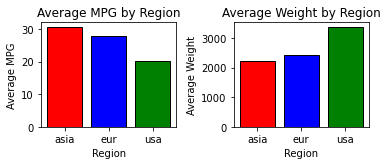

In [15]:
colors1 = ['red', 'blue', 'green']
plt.figure(figsize=[8,4])
plt.subplot(2,3,1)
plt.bar(x=mean_df.index, height=mean_df['MPG_AVG'], color=colors1, edgecolor='black')
plt.title('Average MPG by Region')
plt.xlabel('Region')
plt.ylabel('Average MPG')
plt.subplot(2,3,2)
plt.bar(x=mean_df.index, height=mean_df['WT_AVG'], color=colors1, edgecolor='black')
plt.title('Average Weight by Region')
plt.xlabel('Region')
plt.ylabel('Average Weight')
plt.tight_layout()
plt.show()

## Problem 7: Relationship between Weight and Miles Per Gallon

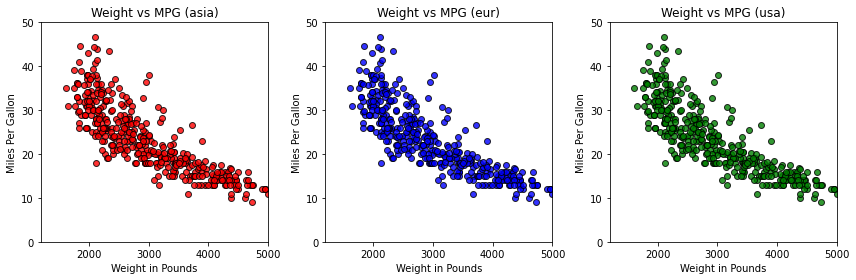

In [16]:
plt.figure(figsize=[12,4])
for i in range(0, len(regions)):
    plt.subplot(1,3,i+1)
    plt.scatter(x=np.where(auto['region']==regions[i], auto['wt'] ,auto['wt']), y=np.where(auto['region']==regions[i], auto['mpg'] , auto['mpg']), alpha=.8, color=colors1[i], edgecolor='black')
    plt.xlim([1200,5000])
    plt.ylim([0,50])
    plt.xlabel('Weight in Pounds')
    plt.ylabel('Miles Per Gallon')
    plt.title(f'Weight vs MPG ({regions[i]})')
plt.tight_layout()
plt.show()

## Problem 8: Cylinder Distribution by Region

In [17]:
cyl_values = np.unique(auto['cyl'])

cyl_counts_by_region = pd.crosstab(auto['cyl'], auto['region'])
display(cyl_counts_by_region)

region,asia,eur,usa
cyl,,,
3,4,0,0
4,69,63,72
5,0,3,0
6,6,4,74
8,0,0,103


<AxesSubplot:xlabel='cyl'>

<Figure size 432x288 with 0 Axes>

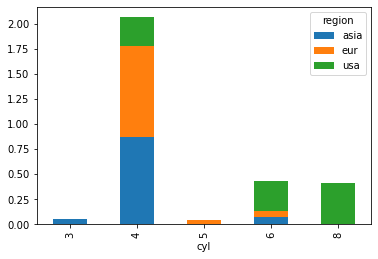

In [18]:
cyl_props_by_region = cyl_counts_by_region/(np.sum(cyl_counts_by_region))
bar_bottoms = (np.cumsum(cyl_props_by_region) - cyl_props_by_region)
colors2=['red','blue','green','purple','yellow']
plt.figure(figsize=[6,4])
cyl_props_by_region.plot(kind='bar', stacked=True)